In [14]:
#indepth eda of netflix dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud 

sns.set_style('darkgrid')

In [15]:
df=pd.read_csv('netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [16]:
df.shape

(7787, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [18]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [19]:
#data cleaning
#handling missing data of director

df.isnull().sum()


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [20]:
df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('unknown',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6848\503549353.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('unknown',inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_6848\503549353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [21]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [22]:
df['country'].fillna(df['country'].mode()[0],inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6848\668350743.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0],inplace=True)


In [23]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [24]:
df.dropna(subset=['date_added','rating'],inplace=True)

In [25]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [26]:
#convert date to int

df['date_added']=pd.to_datetime(df['date_added'],format='mixed',dayfirst=True )
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [27]:
#extract year and month
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

In [28]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [29]:
df.isnull().sum()   

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

## eda and visualisation

In [30]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [31]:
df['type'].value_counts()

type
Movie      5372
TV Show    2398
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x22848bc6cb0>,
 [Text(-0.10642633623617724, -1.0948394562470538, 'Movie'),
  Text(0.10642633623617738, 1.0948394562470538, 'TV Show')],
 [Text(-0.05805072885609667, -0.5971851579529384, '69.1%'),
  Text(0.058050728856096745, 0.5971851579529384, '30.9%')])

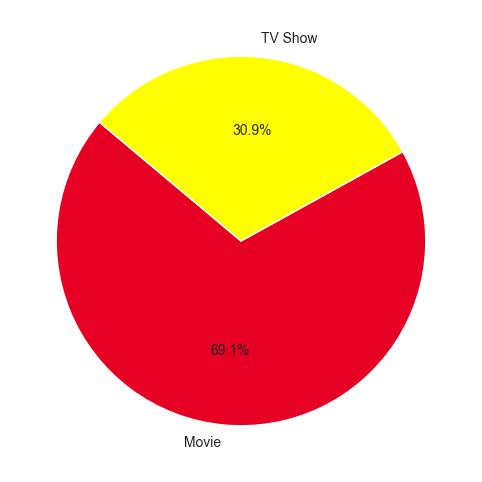

In [32]:
#create pie chart for movie and tv shows

plt.figure(figsize=(8,6))
type_count=df['type'].value_counts()    
plt.pie(type_count,labels=type_count.index,autopct='%1.1f%%',startangle=140,colors=['#e60023','yellow'
'']   )

<Figure size 1400x800 with 0 Axes>

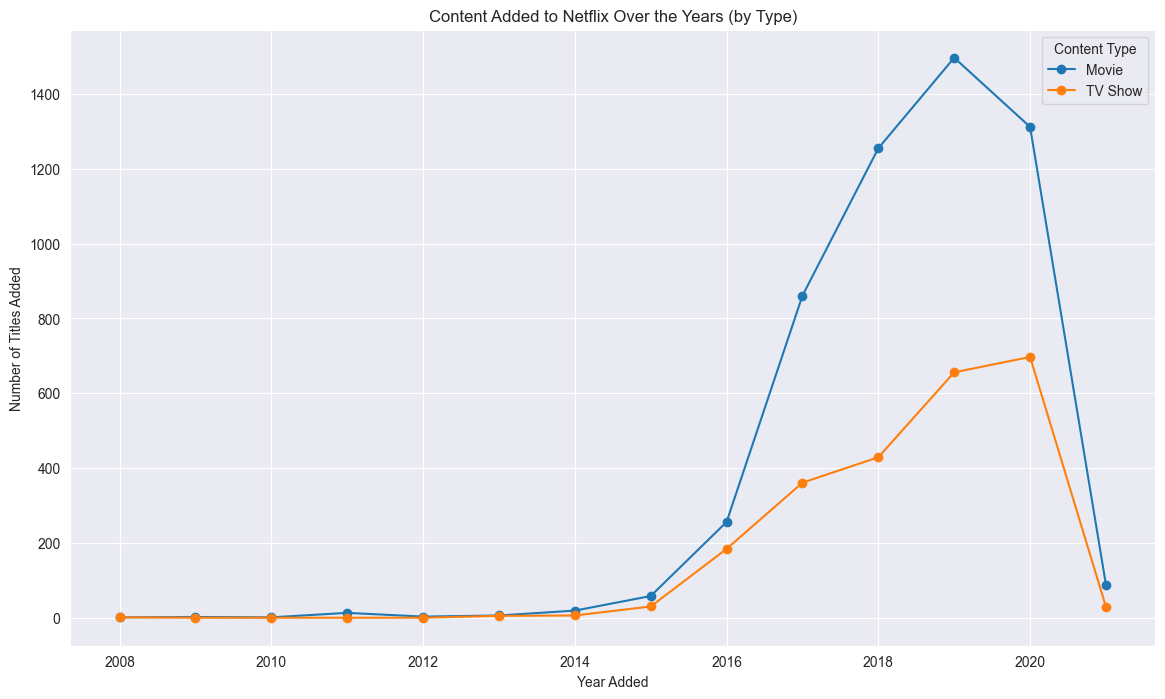

In [33]:
content_over_time = df.groupby(['year_added','type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [34]:
#most popular genres (listed_in)

df['listed_in'].value_counts()


listed_in
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 491, dtype: 

In [35]:
# Split the 'listed_in' column and explode it
genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

In [36]:
genres

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7785,Movie,Zulu Man in Japan,unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,Music & Musicals
7785,s7786,TV Show,Zumbo's Just Desserts,unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,International TV Shows
7785,s7786,TV Show,Zumbo's Just Desserts,unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,Reality TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Documentaries


In [37]:
top_genres = genres['genre'].value_counts().reset_index()
top_genres.columns = ['genre','count']

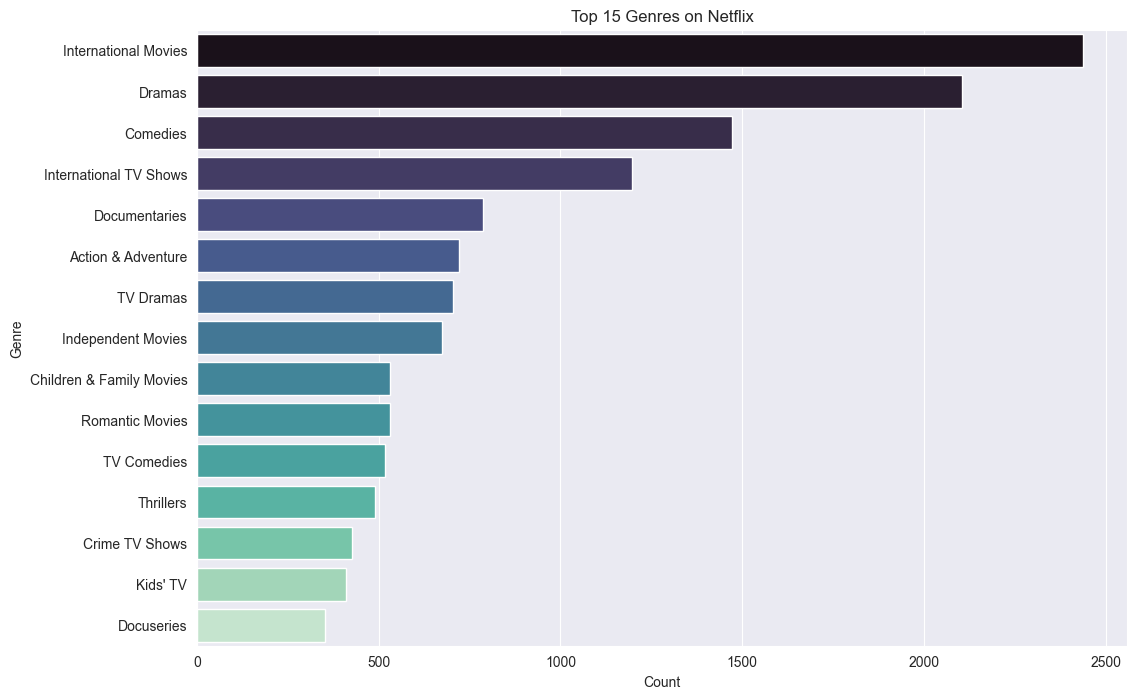

In [38]:
top_15_genres = top_genres.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_15_genres, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [39]:
# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [40]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

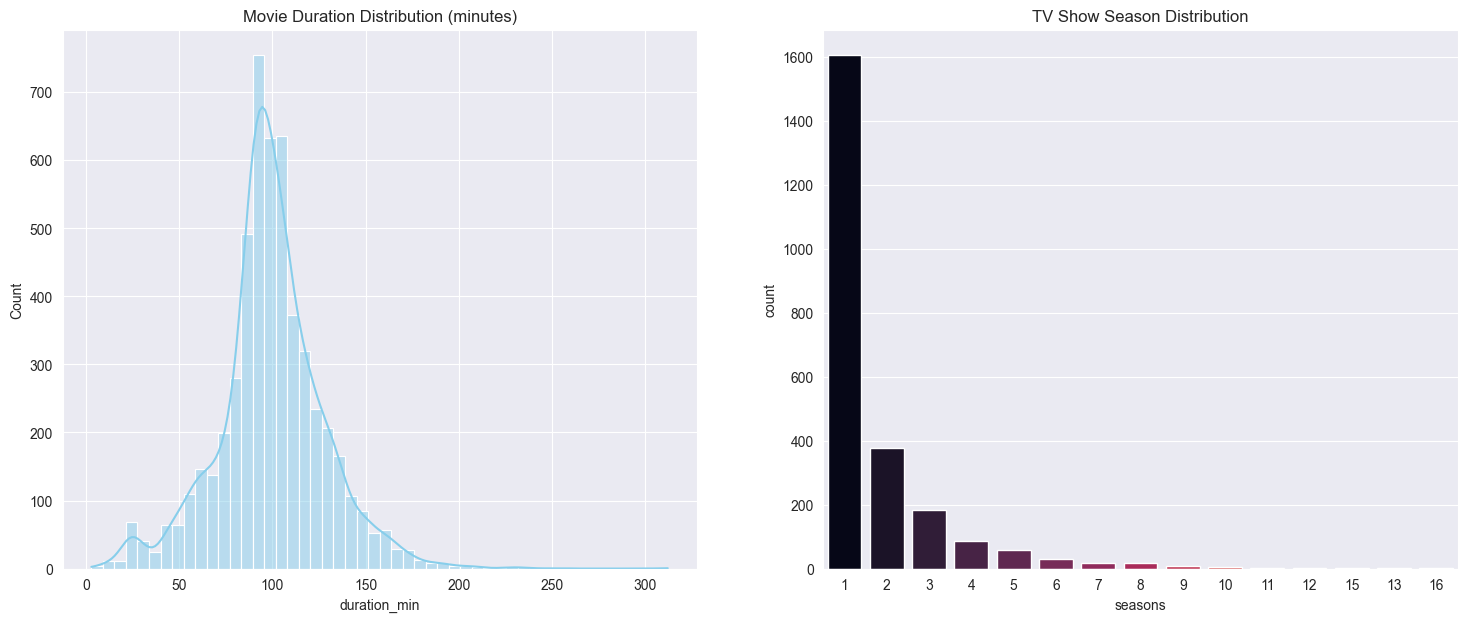

In [41]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

In [42]:
#where does the content come ftom

df['country'].value_counts()

country
United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 681, dtype: int64

In [43]:
# Handle the multi-country listings similar to genres
countries = df.assign(country=df['country'].str.split(', ')).explode('country')

In [44]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

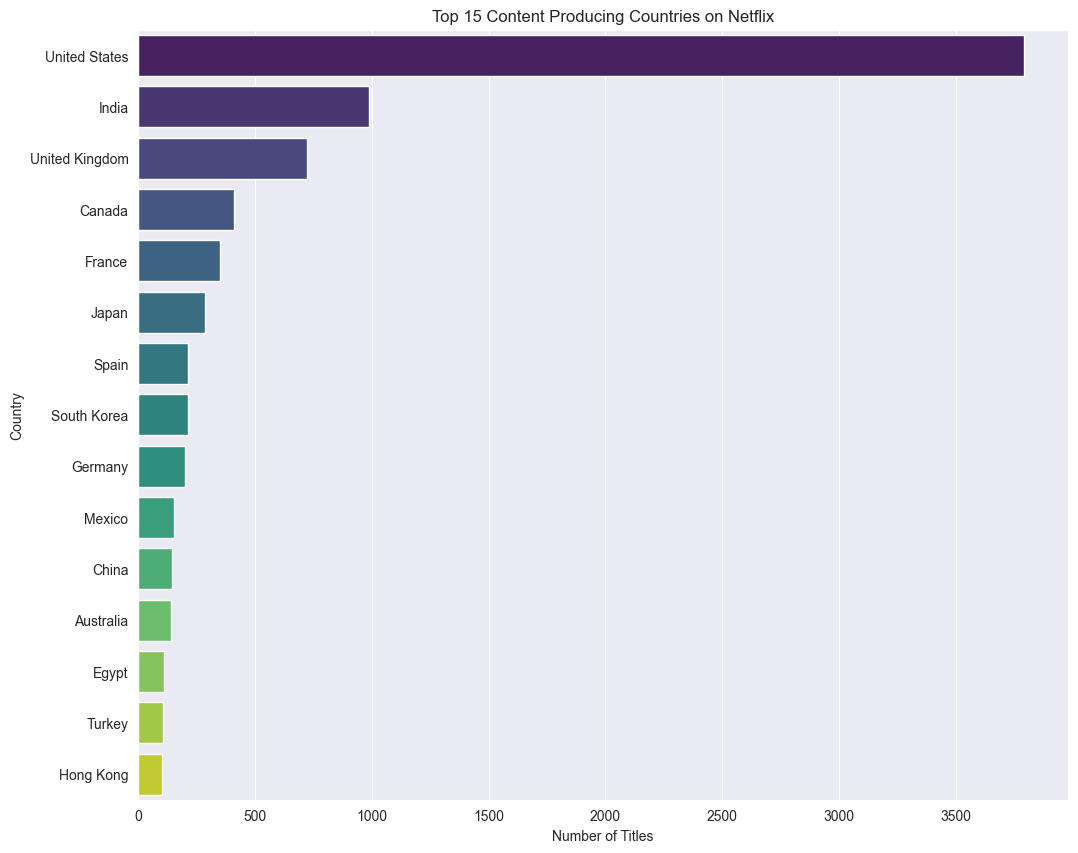

In [45]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

<Axes: xlabel='rating'>

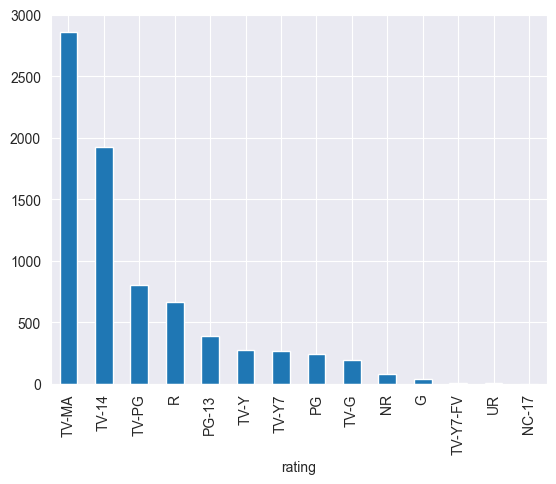

In [46]:
#maturity ratings

df['rating'].value_counts().plot(kind = 'bar')

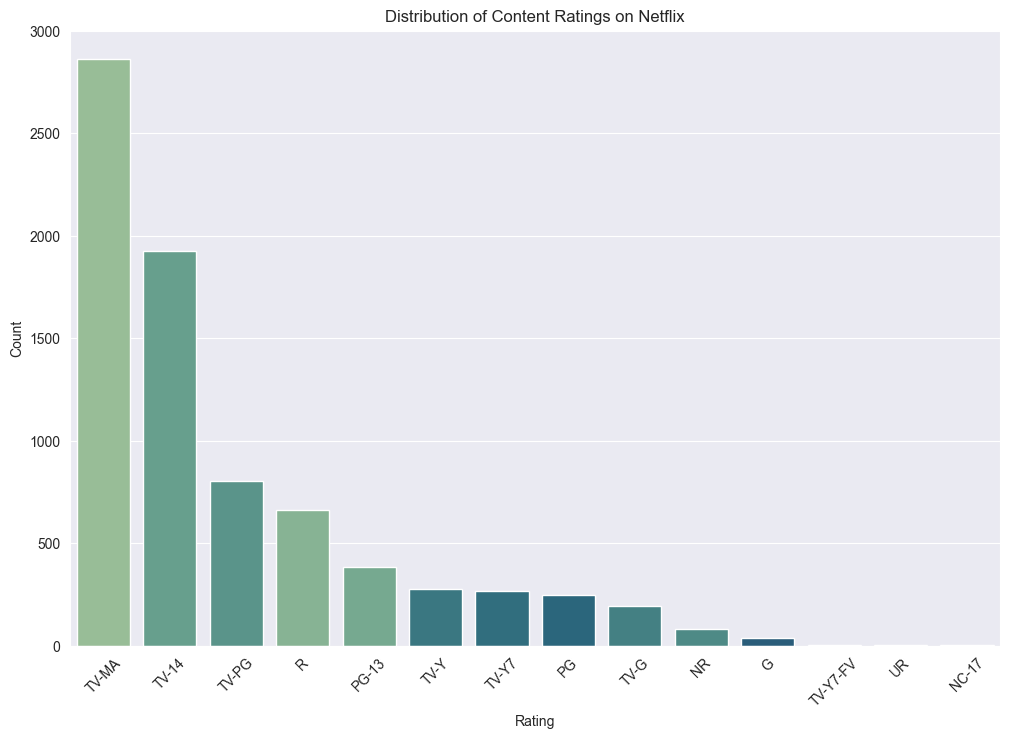

In [47]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [48]:
#feature engineering - content freshness

df['age_on_netflix'] = df['year_added'] - df['release_year']    

In [49]:
#filter out potential errors where added_year is before release_year

content_age=df[df['age_on_netflix']>=0]

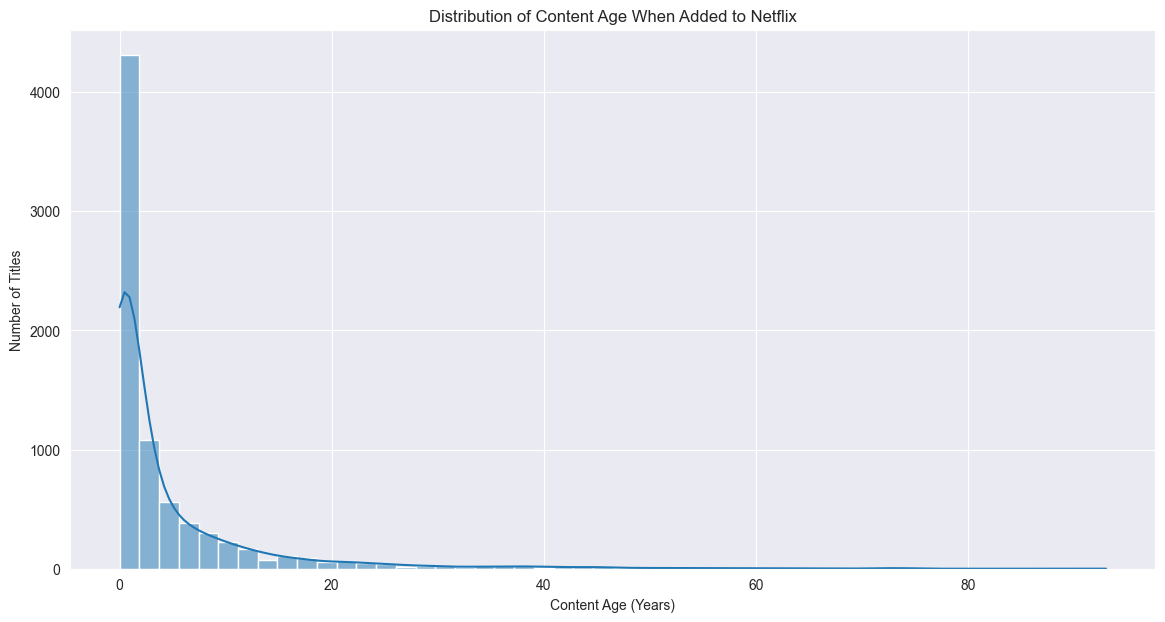

In [50]:
plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

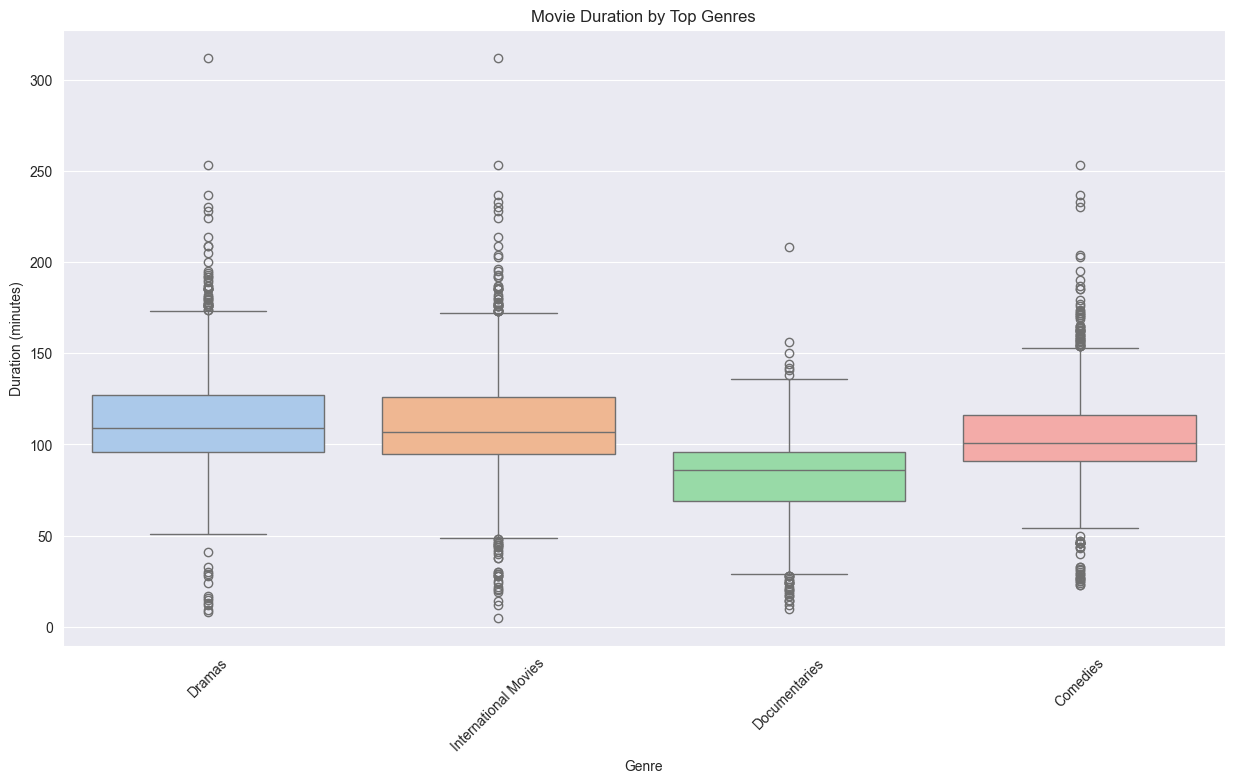

In [51]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

In [52]:
#wordcloud for content descripton

df['description']

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

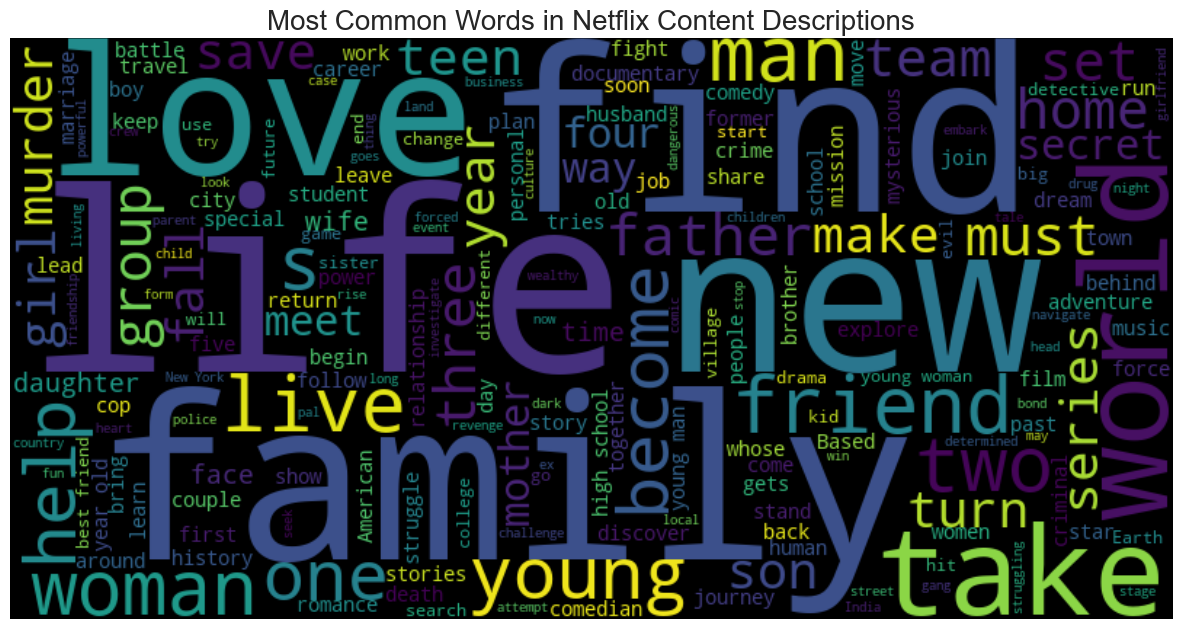

In [53]:
# Combine all descriptions into a single string
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

# Advanced Analysis Questions

## 1. How has the distribution of content ratings changed over time?


<Figure size 1600x1000 with 0 Axes>

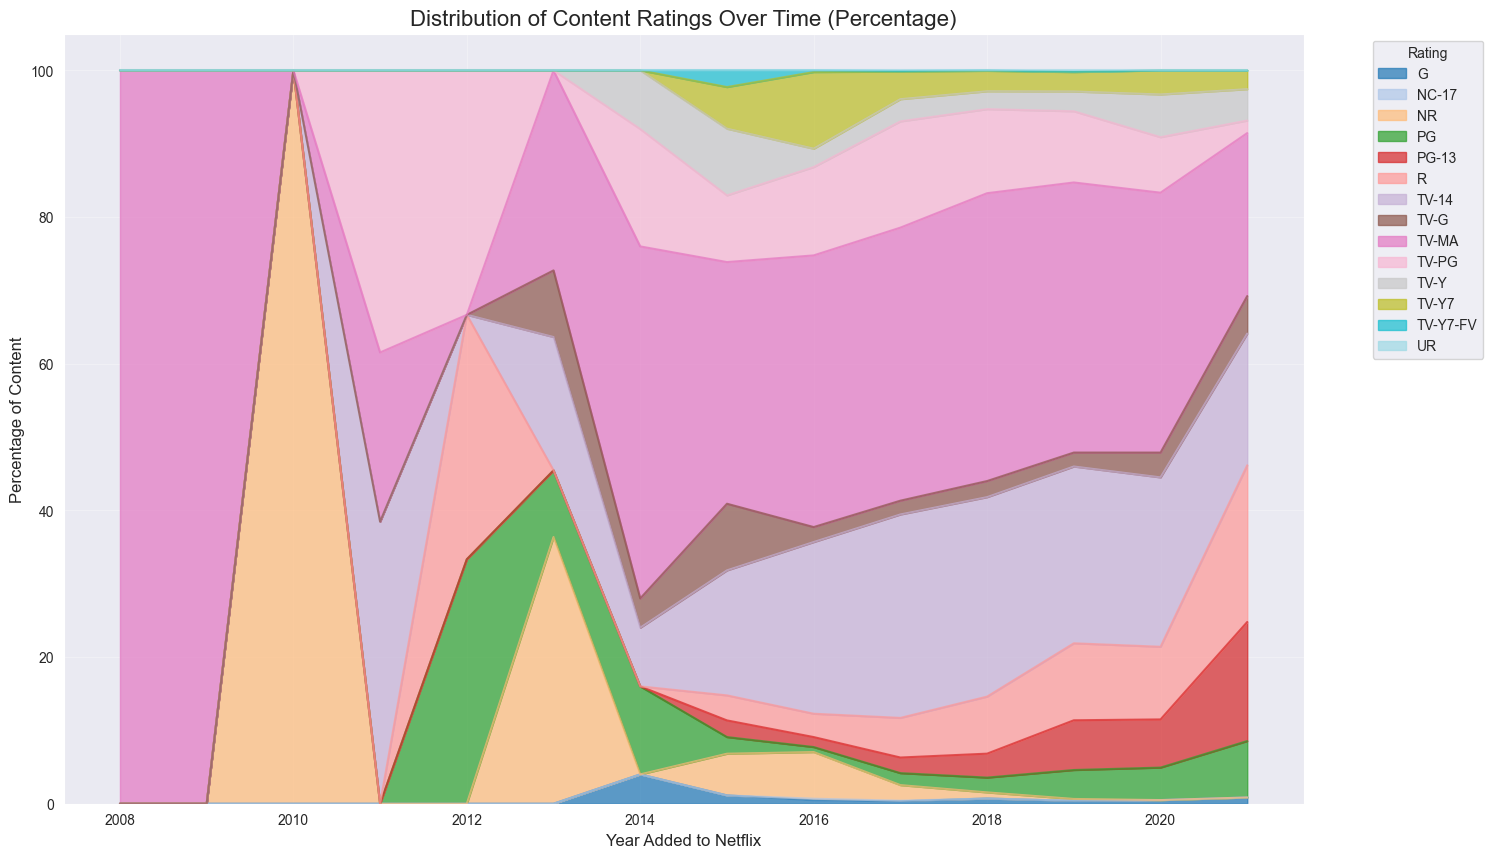

<Figure size 1600x800 with 0 Axes>

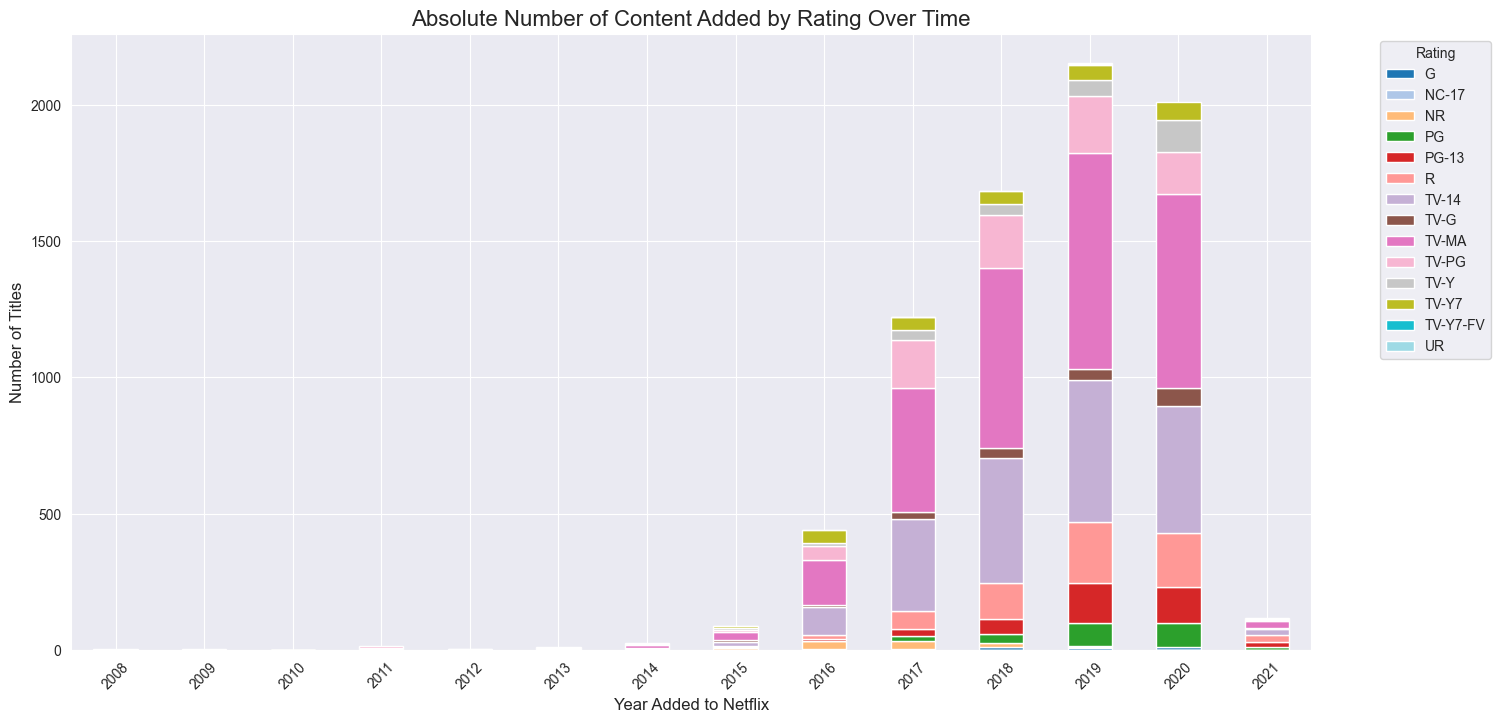

In [62]:

ratings_over_time = df.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

ratings_percentage = ratings_over_time.div(ratings_over_time.sum(axis=1), axis=0) * 100

plt.figure(figsize=(16, 10))
ratings_percentage.plot(kind='area', stacked=True, figsize=(16, 10), 
                       colormap='tab20', alpha=0.7)
plt.title('Distribution of Content Ratings Over Time (Percentage)', fontsize=16)
plt.xlabel('Year Added to Netflix', fontsize=12)
plt.ylabel('Percentage of Content', fontsize=12)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(16, 8))
ratings_over_time.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')
plt.title('Absolute Number of Content Added by Rating Over Time', fontsize=16)
plt.xlabel('Year Added to Netflix', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [63]:
print("Summary of Rating Distribution Changes Over Time:")
print("=" * 50)

# Get the first and last few years with data
first_years = ratings_percentage.head(3)
last_years = ratings_percentage.tail(3)

print("\nEarly Years (2008-2010):")
print(first_years.round(2))

print("\nRecent Years (2019-2021):")
print(last_years.round(2))

major_ratings = ['TV-MA', 'TV-14', 'R', 'TV-PG', 'PG-13']
print(f"\nChange in Major Ratings (Early vs Recent):")
for rating in major_ratings:
    if rating in ratings_percentage.columns:
        early_avg = first_years[rating].mean()
        recent_avg = last_years[rating].mean()
        change = recent_avg - early_avg
        print(f"{rating}: {early_avg:.1f}% → {recent_avg:.1f}% (Change: {change:+.1f}%)")


Summary of Rating Distribution Changes Over Time:

Early Years (2008-2010):
rating        G  NC-17     NR   PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  \
year_added                                                                  
2008        0.0    0.0    0.0  0.0    0.0  0.0    0.0   0.0  100.0    0.0   
2009        0.0    0.0    0.0  0.0    0.0  0.0    0.0   0.0  100.0    0.0   
2010        0.0    0.0  100.0  0.0    0.0  0.0    0.0   0.0    0.0    0.0   

rating      TV-Y  TV-Y7  TV-Y7-FV   UR  
year_added                              
2008         0.0    0.0       0.0  0.0  
2009         0.0    0.0       0.0  0.0  
2010         0.0    0.0       0.0  0.0  

Recent Years (2019-2021):
rating         G  NC-17    NR    PG  PG-13      R  TV-14  TV-G  TV-MA  TV-PG  \
year_added                                                                     
2019        0.37   0.05  0.23  3.95   6.78  10.50  24.11  1.90  36.83   9.71   
2020        0.50   0.00  0.00  4.43   6.57   9.91  23.10  3.38  35

## 2. Is there a relationship between content age and its type (Movie vs. TV Show)?


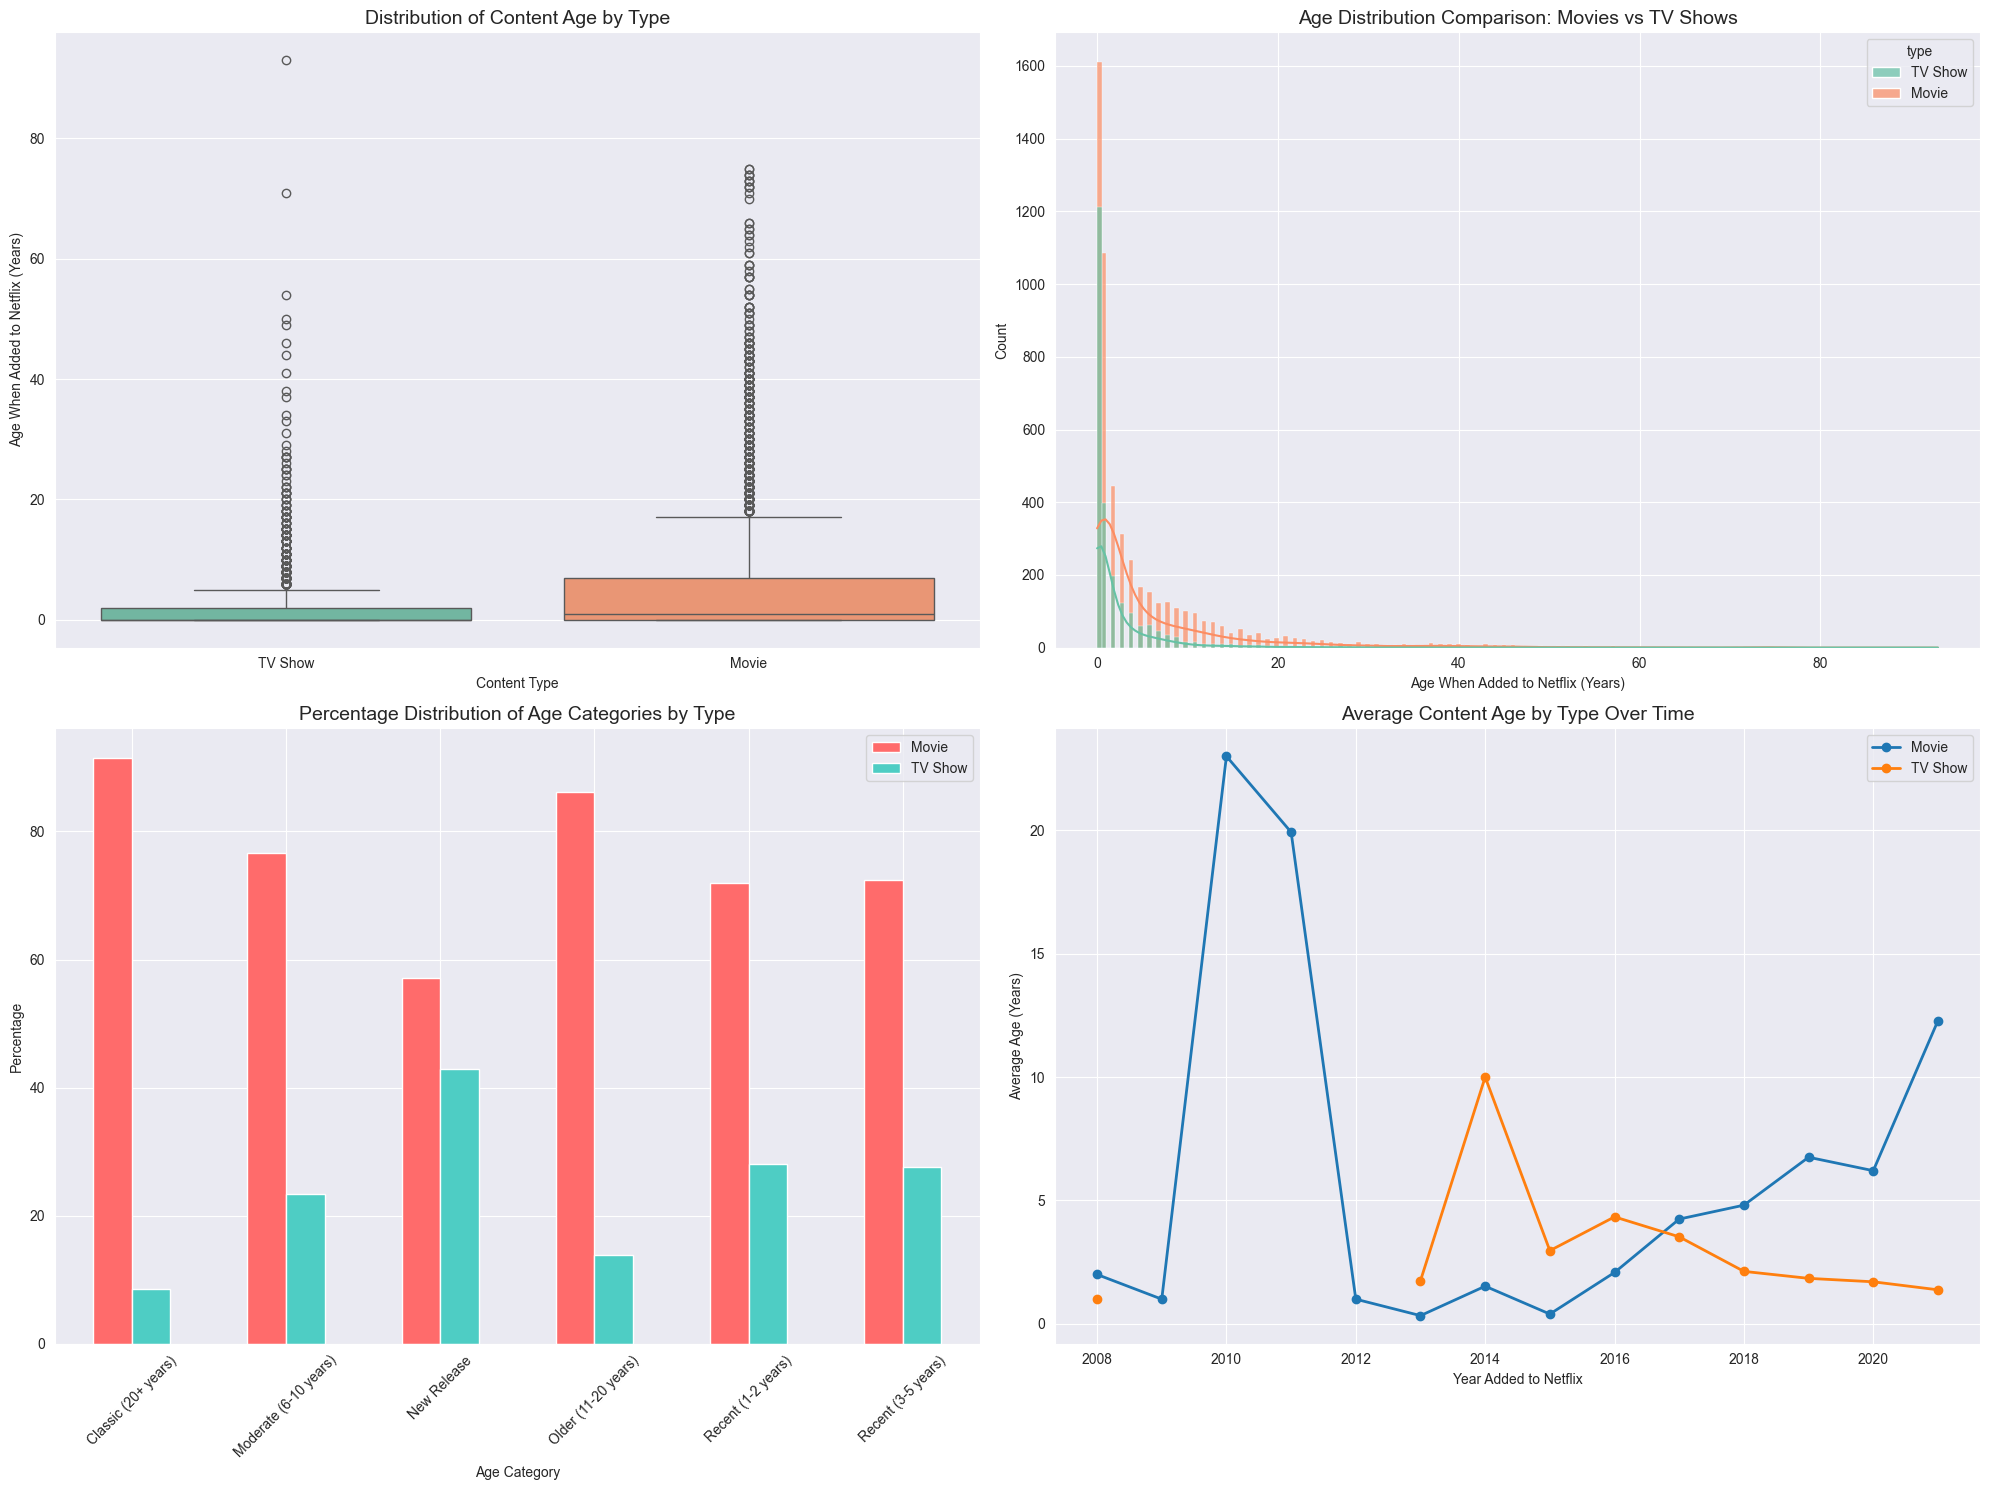

In [64]:

content_age_analysis = df[df['age_on_netflix'] >= 0].copy()

# Create age categories for better analysis
def categorize_age(age):
    if age == 0:
        return 'New Release'
    elif age <= 2:
        return 'Recent (1-2 years)'
    elif age <= 5:
        return 'Recent (3-5 years)'
    elif age <= 10:
        return 'Moderate (6-10 years)'
    elif age <= 20:
        return 'Older (11-20 years)'
    else:
        return 'Classic (20+ years)'

content_age_analysis['age_category'] = content_age_analysis['age_on_netflix'].apply(categorize_age)

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Box plot of age distribution by type
sns.boxplot(ax=axes[0,0], data=content_age_analysis, x='type', y='age_on_netflix', palette='Set2')
axes[0,0].set_title('Distribution of Content Age by Type', fontsize=14)
axes[0,0].set_xlabel('Content Type')
axes[0,0].set_ylabel('Age When Added to Netflix (Years)')

# 2. Histogram comparison
sns.histplot(ax=axes[0,1], data=content_age_analysis, x='age_on_netflix', hue='type', 
             kde=True, alpha=0.7, palette='Set2')
axes[0,1].set_title('Age Distribution Comparison: Movies vs TV Shows', fontsize=14)
axes[0,1].set_xlabel('Age When Added to Netflix (Years)')
axes[0,1].set_ylabel('Count')

# 3. Age categories by type
age_type_crosstab = pd.crosstab(content_age_analysis['age_category'], content_age_analysis['type'], normalize='index') * 100
age_type_crosstab.plot(kind='bar', ax=axes[1,0], color=['#FF6B6B', '#4ECDC4'])
axes[1,0].set_title('Percentage Distribution of Age Categories by Type', fontsize=14)
axes[1,0].set_xlabel('Age Category')
axes[1,0].set_ylabel('Percentage')
axes[1,0].legend(['Movie', 'TV Show'])
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Average age by type over time
avg_age_over_time = content_age_analysis.groupby(['year_added', 'type'])['age_on_netflix'].mean().unstack()
avg_age_over_time.plot(ax=axes[1,1], marker='o', linewidth=2)
axes[1,1].set_title('Average Content Age by Type Over Time', fontsize=14)
axes[1,1].set_xlabel('Year Added to Netflix')
axes[1,1].set_ylabel('Average Age (Years)')
axes[1,1].legend(['Movie', 'TV Show'])

plt.tight_layout()
plt.show()


In [65]:
print("Statistical Analysis: Content Age vs Type")
print("=" * 50)

movie_age_stats = content_age_analysis[content_age_analysis['type'] == 'Movie']['age_on_netflix']
tv_age_stats = content_age_analysis[content_age_analysis['type'] == 'TV Show']['age_on_netflix']

print(f"\nMovie Age Statistics:")
print(f"Mean Age: {movie_age_stats.mean():.2f} years")
print(f"Median Age: {movie_age_stats.median():.2f} years")
print(f"Std Deviation: {movie_age_stats.std():.2f} years")

print(f"\nTV Show Age Statistics:")
print(f"Mean Age: {tv_age_stats.mean():.2f} years")
print(f"Median Age: {tv_age_stats.median():.2f} years")
print(f"Std Deviation: {tv_age_stats.std():.2f} years")

# Age category distribution
print(f"\nAge Category Distribution:")
age_dist = pd.crosstab(content_age_analysis['type'], content_age_analysis['age_category'], normalize='index') * 100
print(age_dist.round(1))

# Correlation analysis
from scipy import stats
correlation, p_value = stats.pearsonr(content_age_analysis['type'].map({'Movie': 0, 'TV Show': 1}), 
                                     content_age_analysis['age_on_netflix'])
print(f"\nCorrelation Analysis:")
print(f"Correlation between type and age: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# T-test to compare means
t_stat, t_pvalue = stats.ttest_ind(movie_age_stats, tv_age_stats)
print(f"\nT-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {t_pvalue:.4f}")
print(f"Are the means significantly different? {'Yes' if t_pvalue < 0.05 else 'No'}")


Statistical Analysis: Content Age vs Type

Movie Age Statistics:
Mean Age: 5.57 years
Median Age: 1.00 years
Std Deviation: 9.73 years

TV Show Age Statistics:
Mean Age: 2.33 years
Median Age: 0.00 years
Std Deviation: 5.29 years

Age Category Distribution:
age_category  Classic (20+ years)  Moderate (6-10 years)  New Release  \
type                                                                    
Movie                         7.1                   11.5         30.0   
TV Show                       1.5                    7.9         50.7   

age_category  Older (11-20 years)  Recent (1-2 years)  Recent (3-5 years)  
type                                                                       
Movie                         9.5                28.5                13.5  
TV Show                       3.4                25.0                11.6  

Correlation Analysis:
Correlation between type and age: -0.1711
P-value: 0.0000

T-test Results:
T-statistic: 15.2975
P-value: 0.0000
Are the me

## 3. Can we identify any trends in content production based on the release year vs. the year added to Netflix?


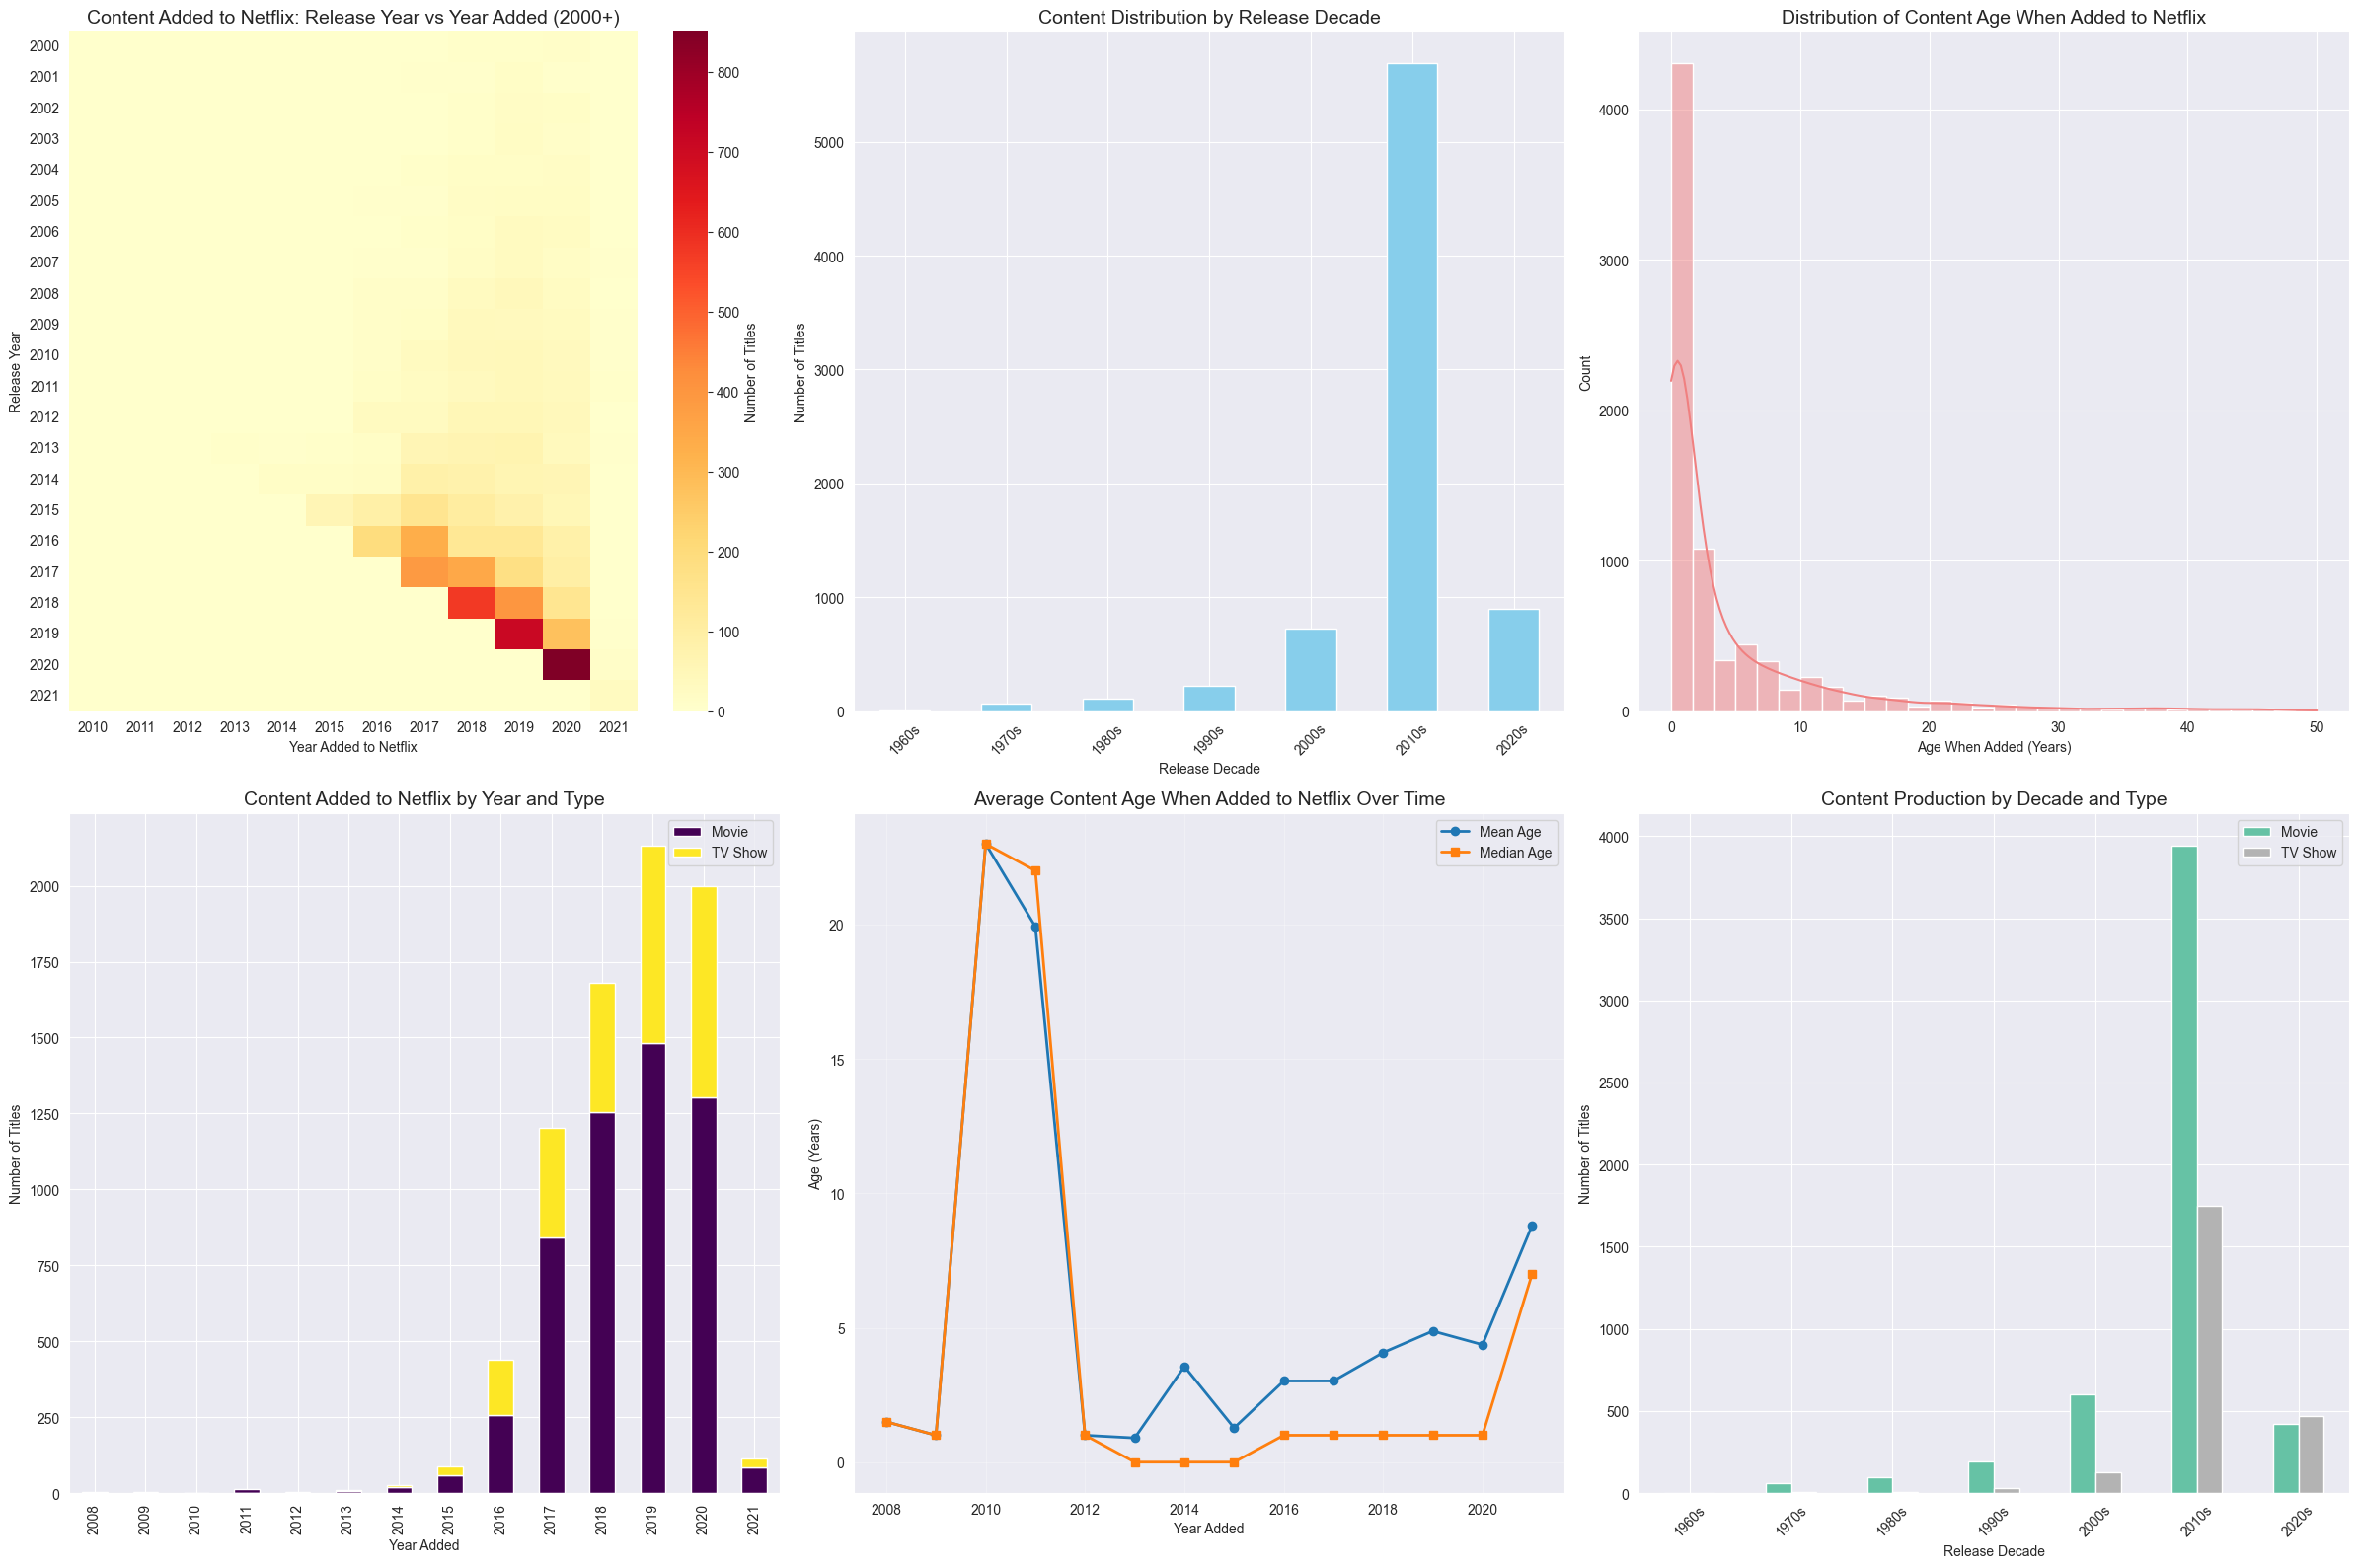

In [66]:

production_analysis = df[(df['age_on_netflix'] >= 0) & (df['age_on_netflix'] <= 50)].copy()

def get_decade(year):
    return f"{str(year)[:3]}0s"

production_analysis['release_decade'] = production_analysis['release_year'].apply(get_decade)

fig, axes = plt.subplots(2, 3, figsize=(24, 16))

pivot_table = production_analysis.groupby(['release_year', 'year_added']).size().unstack(fill_value=0)
# Limit to recent years for better visualization
recent_pivot = pivot_table.loc[pivot_table.index >= 2000, pivot_table.columns >= 2010]

sns.heatmap(ax=axes[0,0], data=recent_pivot, cmap='YlOrRd', cbar_kws={'label': 'Number of Titles'})
axes[0,0].set_title('Content Added to Netflix: Release Year vs Year Added (2000+)', fontsize=14)
axes[0,0].set_xlabel('Year Added to Netflix')
axes[0,0].set_ylabel('Release Year')

# 2. Distribution of content by release decade
release_decade_dist = production_analysis['release_decade'].value_counts().sort_index()
release_decade_dist.plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Content Distribution by Release Decade', fontsize=14)
axes[0,1].set_xlabel('Release Decade')
axes[0,1].set_ylabel('Number of Titles')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Age distribution when added to Netflix
sns.histplot(ax=axes[0,2], data=production_analysis, x='age_on_netflix', bins=30, kde=True, color='lightcoral')
axes[0,2].set_title('Distribution of Content Age When Added to Netflix', fontsize=14)
axes[0,2].set_xlabel('Age When Added (Years)')
axes[0,2].set_ylabel('Count')

# 4. Content added by year (separated by type)
content_by_year_type = production_analysis.groupby(['year_added', 'type']).size().unstack(fill_value=0)
content_by_year_type.plot(ax=axes[1,0], kind='bar', stacked=True, colormap='viridis')
axes[1,0].set_title('Content Added to Netflix by Year and Type', fontsize=14)
axes[1,0].set_xlabel('Year Added')
axes[1,0].set_ylabel('Number of Titles')
axes[1,0].legend(['Movie', 'TV Show'])

# 5. Average age of content by year added
avg_age_by_year = production_analysis.groupby('year_added')['age_on_netflix'].agg(['mean', 'median']).reset_index()
ax5 = axes[1,1]
ax5.plot(avg_age_by_year['year_added'], avg_age_by_year['mean'], marker='o', label='Mean Age', linewidth=2)
ax5.plot(avg_age_by_year['year_added'], avg_age_by_year['median'], marker='s', label='Median Age', linewidth=2)
ax5.set_title('Average Content Age When Added to Netflix Over Time', fontsize=14)
ax5.set_xlabel('Year Added')
ax5.set_ylabel('Age (Years)')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Production trends by decade
decade_analysis = production_analysis.groupby(['release_decade', 'type']).size().unstack(fill_value=0)
decade_analysis.plot(ax=axes[1,2], kind='bar', colormap='Set2')
axes[1,2].set_title('Content Production by Decade and Type', fontsize=14)
axes[1,2].set_xlabel('Release Decade')
axes[1,2].set_ylabel('Number of Titles')
axes[1,2].legend(['Movie', 'TV Show'])
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [67]:
# Detailed analysis of production trends
print("Content Production Trends Analysis")
print("=" * 50)

lag_analysis = production_analysis.groupby('release_decade')['age_on_netflix'].agg(['count', 'mean', 'median', 'std']).round(2)
print("\nContent Age When Added to Netflix by Release Decade:")
print(lag_analysis)

recent_content = production_analysis[production_analysis['release_year'] >= 2010]
older_content = production_analysis[production_analysis['release_year'] < 2010]

print(f"\nRecent Content (2010+):")
print(f"Total titles: {len(recent_content)}")
print(f"Average age when added: {recent_content['age_on_netflix'].mean():.2f} years")
print(f"New releases (age = 0): {len(recent_content[recent_content['age_on_netflix'] == 0])} titles")

print(f"\nOlder Content (pre-2010):")
print(f"Total titles: {len(older_content)}")
print(f"Average age when added: {older_content['age_on_netflix'].mean():.2f} years")

# Netflix acquisition patterns
print(f"\nNetflix Acquisition Patterns:")
acquisition_by_year = production_analysis.groupby('year_added').agg({
    'age_on_netflix': ['mean', 'median', 'count']
}).round(2)
acquisition_by_year.columns = ['Avg_Age', 'Median_Age', 'Count']
print(acquisition_by_year.tail(10))  # Last 10 years

print(f"\nKey Trends Identified:")
print(f"1. Most content added to Netflix is between {production_analysis['age_on_netflix'].quantile(0.25):.1f} and {production_analysis['age_on_netflix'].quantile(0.75):.1f} years old")
print(f"2. {len(production_analysis[production_analysis['age_on_netflix'] == 0])} titles were added as new releases")
print(f"3. The oldest content added was {production_analysis['age_on_netflix'].max()} years old")
print(f"4. Recent years show a trend towards adding newer content")


Content Production Trends Analysis

Content Age When Added to Netflix by Release Decade:
                count   mean  median   std
release_decade                            
1960s               3  49.00    49.0  1.00
1970s              67  43.51    43.0  2.99
1980s             106  33.39    34.0  4.28
1990s             225  23.44    23.0  3.14
2000s             725  12.84    13.0  3.20
2010s            5690   1.98     1.0  2.39
2020s             894   0.01     0.0  0.12

Recent Content (2010+):
Total titles: 6584
Average age when added: 1.71 years
New releases (age = 0): 2822 titles

Older Content (pre-2010):
Total titles: 1126
Average age when added: 18.81 years

Netflix Acquisition Patterns:
            Avg_Age  Median_Age  Count
year_added                            
2012           1.00         1.0      3
2013           0.90         0.0     10
2014           3.56         0.0     25
2015           1.27         0.0     88
2016           3.02         1.0    438
2017           3.02    

## 4. What are the most common word pairs or phrases in content descriptions?


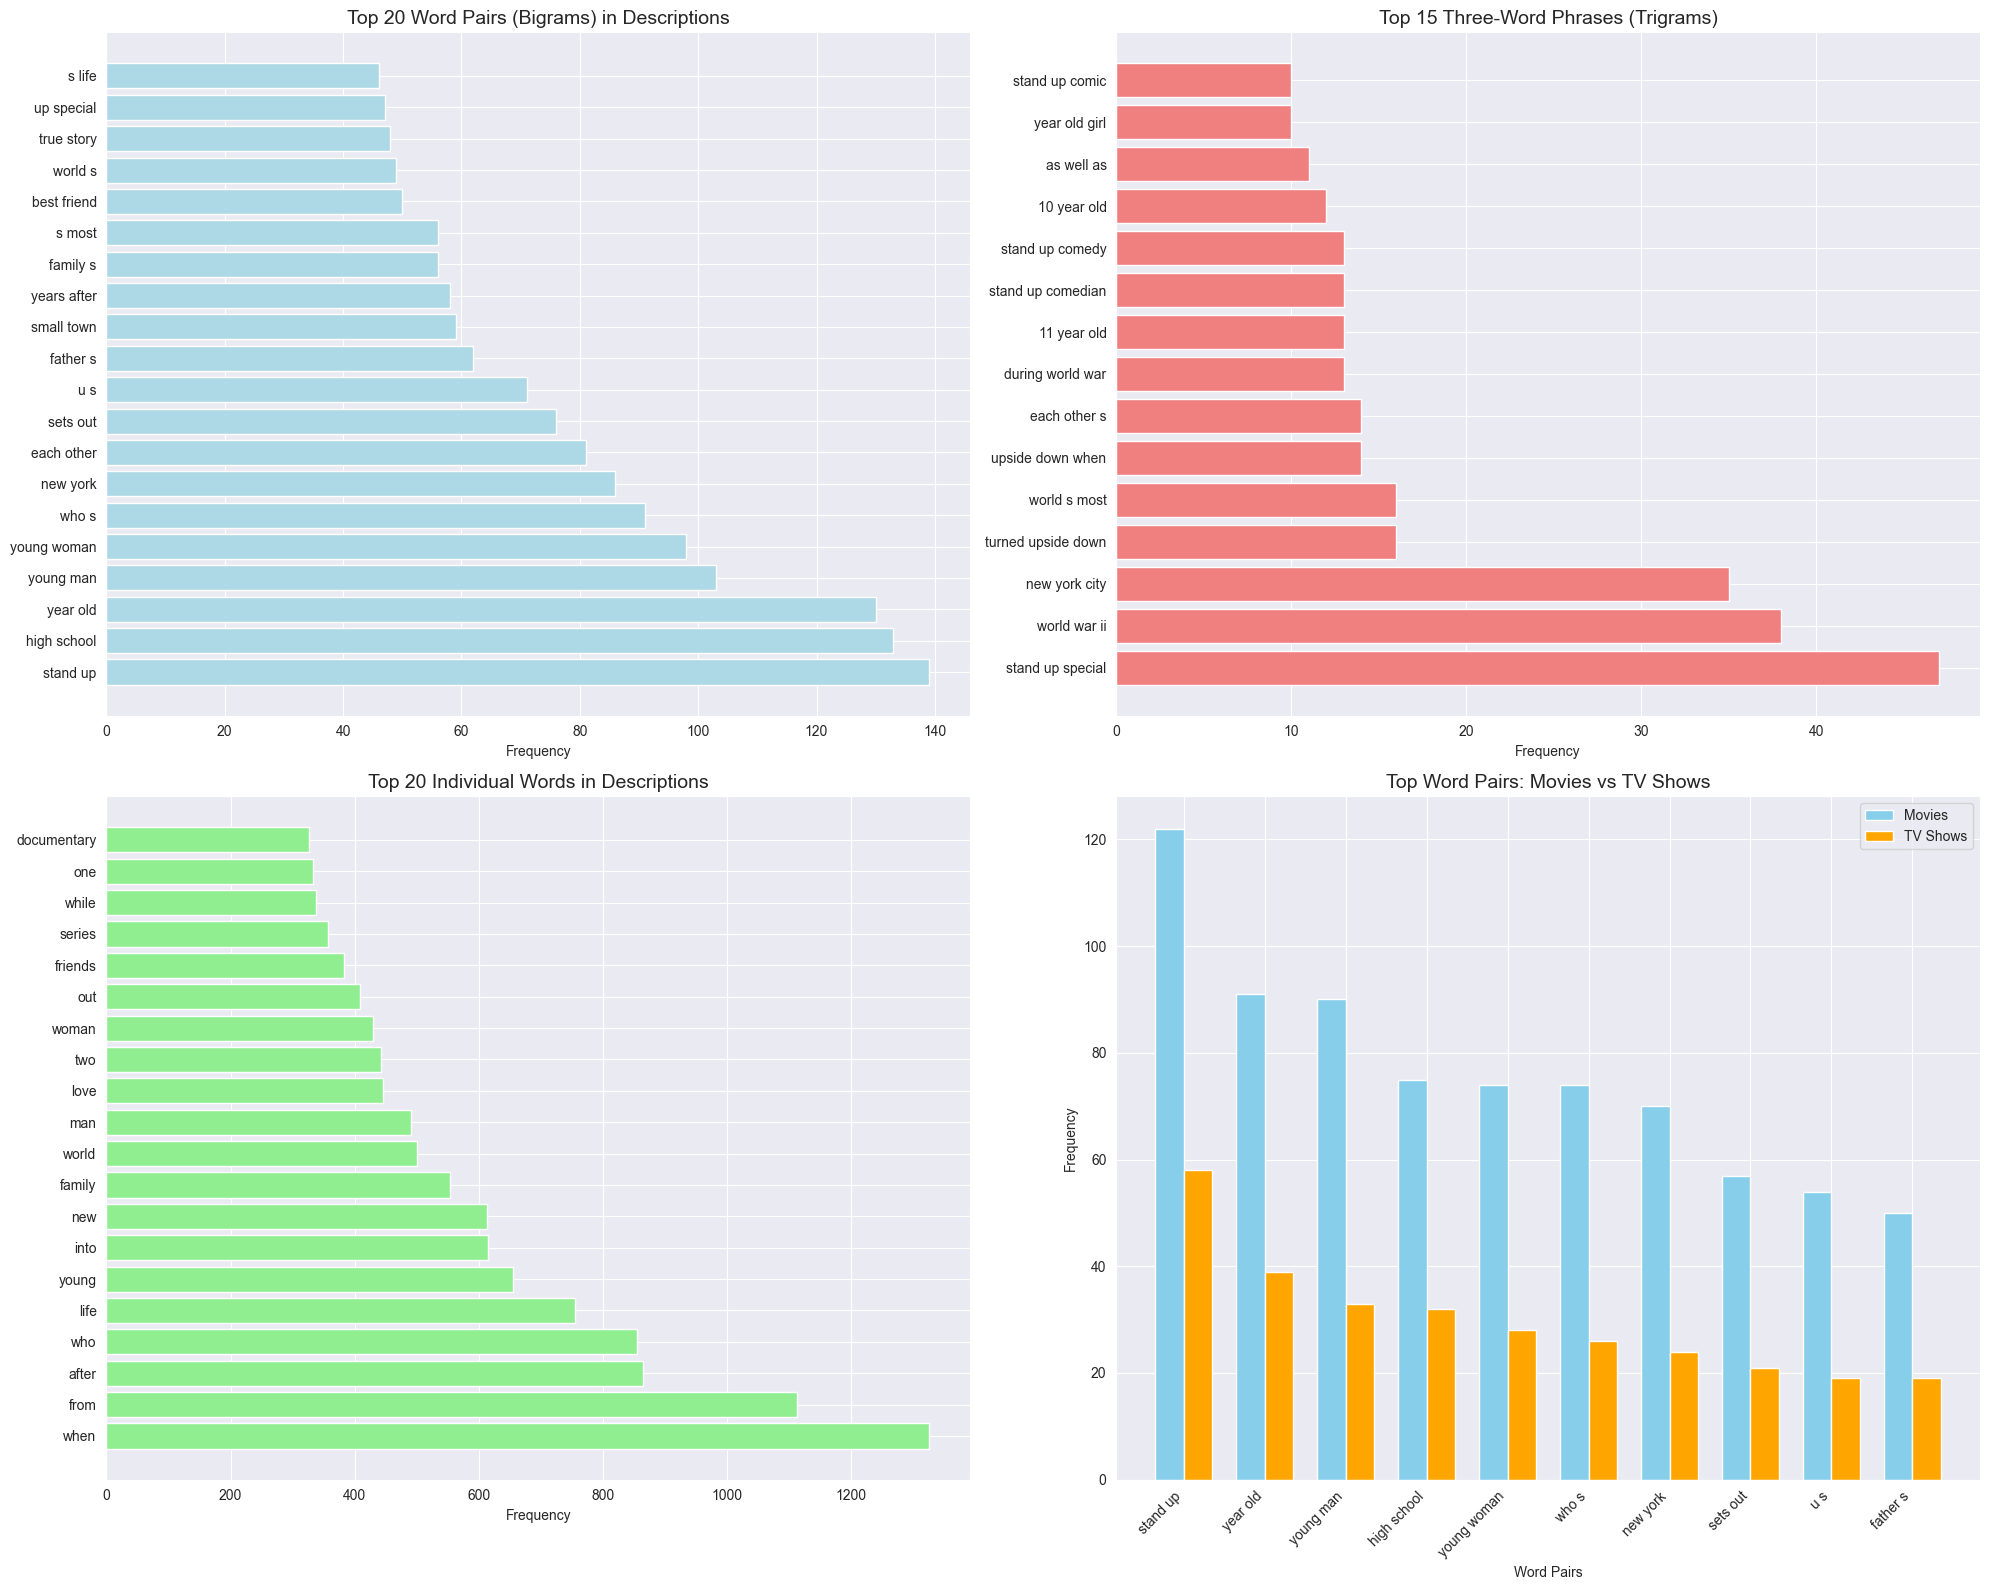

In [68]:
import re
from collections import Counter, defaultdict
from itertools import combinations
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

# Clean and prepare text data
def clean_text(text):
    # Remove special characters and convert to lowercase
    text = re.sub(r'[^\w\s]', ' ', str(text).lower())
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Process descriptions
descriptions = df['description'].dropna().apply(clean_text)
all_text = ' '.join(descriptions)

# Create word pairs (bigrams)
def get_bigrams(text_list):
    bigrams = []
    for text in text_list:
        words = text.split()
        # Create bigrams
        for i in range(len(words) - 1):
            bigrams.append((words[i], words[i + 1]))
    return bigrams

# Get bigrams
bigrams = get_bigrams(descriptions)
bigram_counts = Counter(bigrams)

# Create trigrams (3-word phrases)
def get_trigrams(text_list):
    trigrams = []
    for text in text_list:
        words = text.split()
        # Create trigrams
        for i in range(len(words) - 2):
            trigrams.append((words[i], words[i + 1], words[i + 2]))
    return trigrams

trigrams = get_trigrams(descriptions)
trigram_counts = Counter(trigrams)

# Filter out common stop words
stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must', 'can', 'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them', 'my', 'your', 'his', 'her', 'its', 'our', 'their'}

def filter_phrases(phrase_counts, stop_words):
    filtered = {}
    for phrase, count in phrase_counts.items():
        # Skip if any word in phrase is a stop word
        if not any(word in stop_words for word in phrase):
            filtered[phrase] = count
    return filtered

# Filter bigrams and trigrams
filtered_bigrams = filter_phrases(bigram_counts, stop_words)
filtered_trigrams = filter_phrases(trigram_counts, stop_words)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Top 20 bigrams
top_bigrams = dict(Counter(filtered_bigrams).most_common(20))
bigram_labels = [' '.join(bigram) for bigram in top_bigrams.keys()]
bigram_values = list(top_bigrams.values())

axes[0,0].barh(range(len(bigram_labels)), bigram_values, color='lightblue')
axes[0,0].set_yticks(range(len(bigram_labels)))
axes[0,0].set_yticklabels(bigram_labels)
axes[0,0].set_title('Top 20 Word Pairs (Bigrams) in Descriptions', fontsize=14)
axes[0,0].set_xlabel('Frequency')

# 2. Top 15 trigrams
top_trigrams = dict(Counter(filtered_trigrams).most_common(15))
trigram_labels = [' '.join(trigram) for trigram in top_trigrams.keys()]
trigram_values = list(top_trigrams.values())

axes[0,1].barh(range(len(trigram_labels)), trigram_values, color='lightcoral')
axes[0,1].set_yticks(range(len(trigram_labels)))
axes[0,1].set_yticklabels(trigram_labels)
axes[0,1].set_title('Top 15 Three-Word Phrases (Trigrams)', fontsize=14)
axes[0,1].set_xlabel('Frequency')

# 3. Word frequency analysis
from textblob import TextBlob
all_words = []
for text in descriptions:
    words = [word for word in text.split() if word not in stop_words and len(word) > 2]
    all_words.extend(words)

word_counts = Counter(all_words)
top_words = dict(word_counts.most_common(20))

axes[1,0].barh(range(len(top_words)), list(top_words.values()), color='lightgreen')
axes[1,0].set_yticks(range(len(top_words)))
axes[1,0].set_yticklabels(list(top_words.keys()))
axes[1,0].set_title('Top 20 Individual Words in Descriptions', fontsize=14)
axes[1,0].set_xlabel('Frequency')

# 4. Content type comparison for bigrams
movie_descriptions = df[df['type'] == 'Movie']['description'].dropna().apply(clean_text)
tv_descriptions = df[df['type'] == 'TV Show']['description'].dropna().apply(clean_text)

movie_bigrams = get_bigrams(movie_descriptions)
tv_bigrams = get_bigrams(tv_descriptions)

movie_filtered = filter_phrases(Counter(movie_bigrams), stop_words)
tv_filtered = filter_phrases(Counter(tv_bigrams), stop_words)

# Compare top bigrams for movies vs TV shows
movie_top = dict(Counter(movie_filtered).most_common(10))
tv_top = dict(Counter(tv_filtered).most_common(10))

# Create comparison plot
movie_labels = [' '.join(bigram) for bigram in movie_top.keys()]
tv_labels = [' '.join(bigram) for bigram in tv_top.keys()]

x = np.arange(len(movie_labels))
width = 0.35

movie_values = list(movie_top.values())
tv_values = list(tv_top.values())

axes[1,1].bar(x - width/2, movie_values, width, label='Movies', color='skyblue')
axes[1,1].bar(x + width/2, tv_values, width, label='TV Shows', color='orange')
axes[1,1].set_xlabel('Word Pairs')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Top Word Pairs: Movies vs TV Shows', fontsize=14)
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(movie_labels, rotation=45, ha='right')
axes[1,1].legend()

plt.tight_layout()
plt.show()


In [69]:
print("Word Pairs and Phrases Analysis Results:")
print("=" * 50)
print(f"\nTop 10 Word Pairs (Bigrams):")
for i, (bigram, count) in enumerate(Counter(filtered_bigrams).most_common(10), 1):
    print(f"{i:2d}. {' '.join(bigram)}: {count}")

print(f"\nTop 10 Three-Word Phrases (Trigrams):")
for i, (trigram, count) in enumerate(Counter(filtered_trigrams).most_common(10), 1):
    print(f"{i:2d}. {' '.join(trigram)}: {count}")

print(f"\nTop 10 Individual Words:")
for i, (word, count) in enumerate(word_counts.most_common(10), 1):
    print(f"{i:2d}. {word}: {count}")

print(f"\nMovies vs TV Shows - Top Word Pairs:")
print("Movies:")
for i, (bigram, count) in enumerate(movie_top.items(), 1):
    print(f"  {i}. {' '.join(bigram)}: {count}")

print("TV Shows:")
for i, (bigram, count) in enumerate(tv_top.items(), 1):
    print(f"  {i}. {' '.join(bigram)}: {count}")


Word Pairs and Phrases Analysis Results:

Top 10 Word Pairs (Bigrams):
 1. stand up: 139
 2. high school: 133
 3. year old: 130
 4. young man: 103
 5. young woman: 98
 6. who s: 91
 7. new york: 86
 8. each other: 81
 9. sets out: 76
10. u s: 71

Top 10 Three-Word Phrases (Trigrams):
 1. stand up special: 47
 2. world war ii: 38
 3. new york city: 35
 4. turned upside down: 16
 5. world s most: 16
 6. upside down when: 14
 7. each other s: 14
 8. during world war: 13
 9. 11 year old: 13
10. stand up comedian: 13

Top 10 Individual Words:
 1. when: 1325
 2. from: 1113
 3. after: 864
 4. who: 854
 5. life: 755
 6. young: 655
 7. into: 614
 8. new: 613
 9. family: 553
10. world: 500

Movies vs TV Shows - Top Word Pairs:
Movies:
  1. stand up: 122
  2. year old: 91
  3. young man: 90
  4. high school: 75
  5. young woman: 74
  6. who s: 74
  7. new york: 70
  8. sets out: 57
  9. u s: 54
  10. father s: 50
TV Shows:
  1. high school: 58
  2. year old: 39
  3. each other: 33
  4. documentar

## 5. Who are the top directors on Netflix?


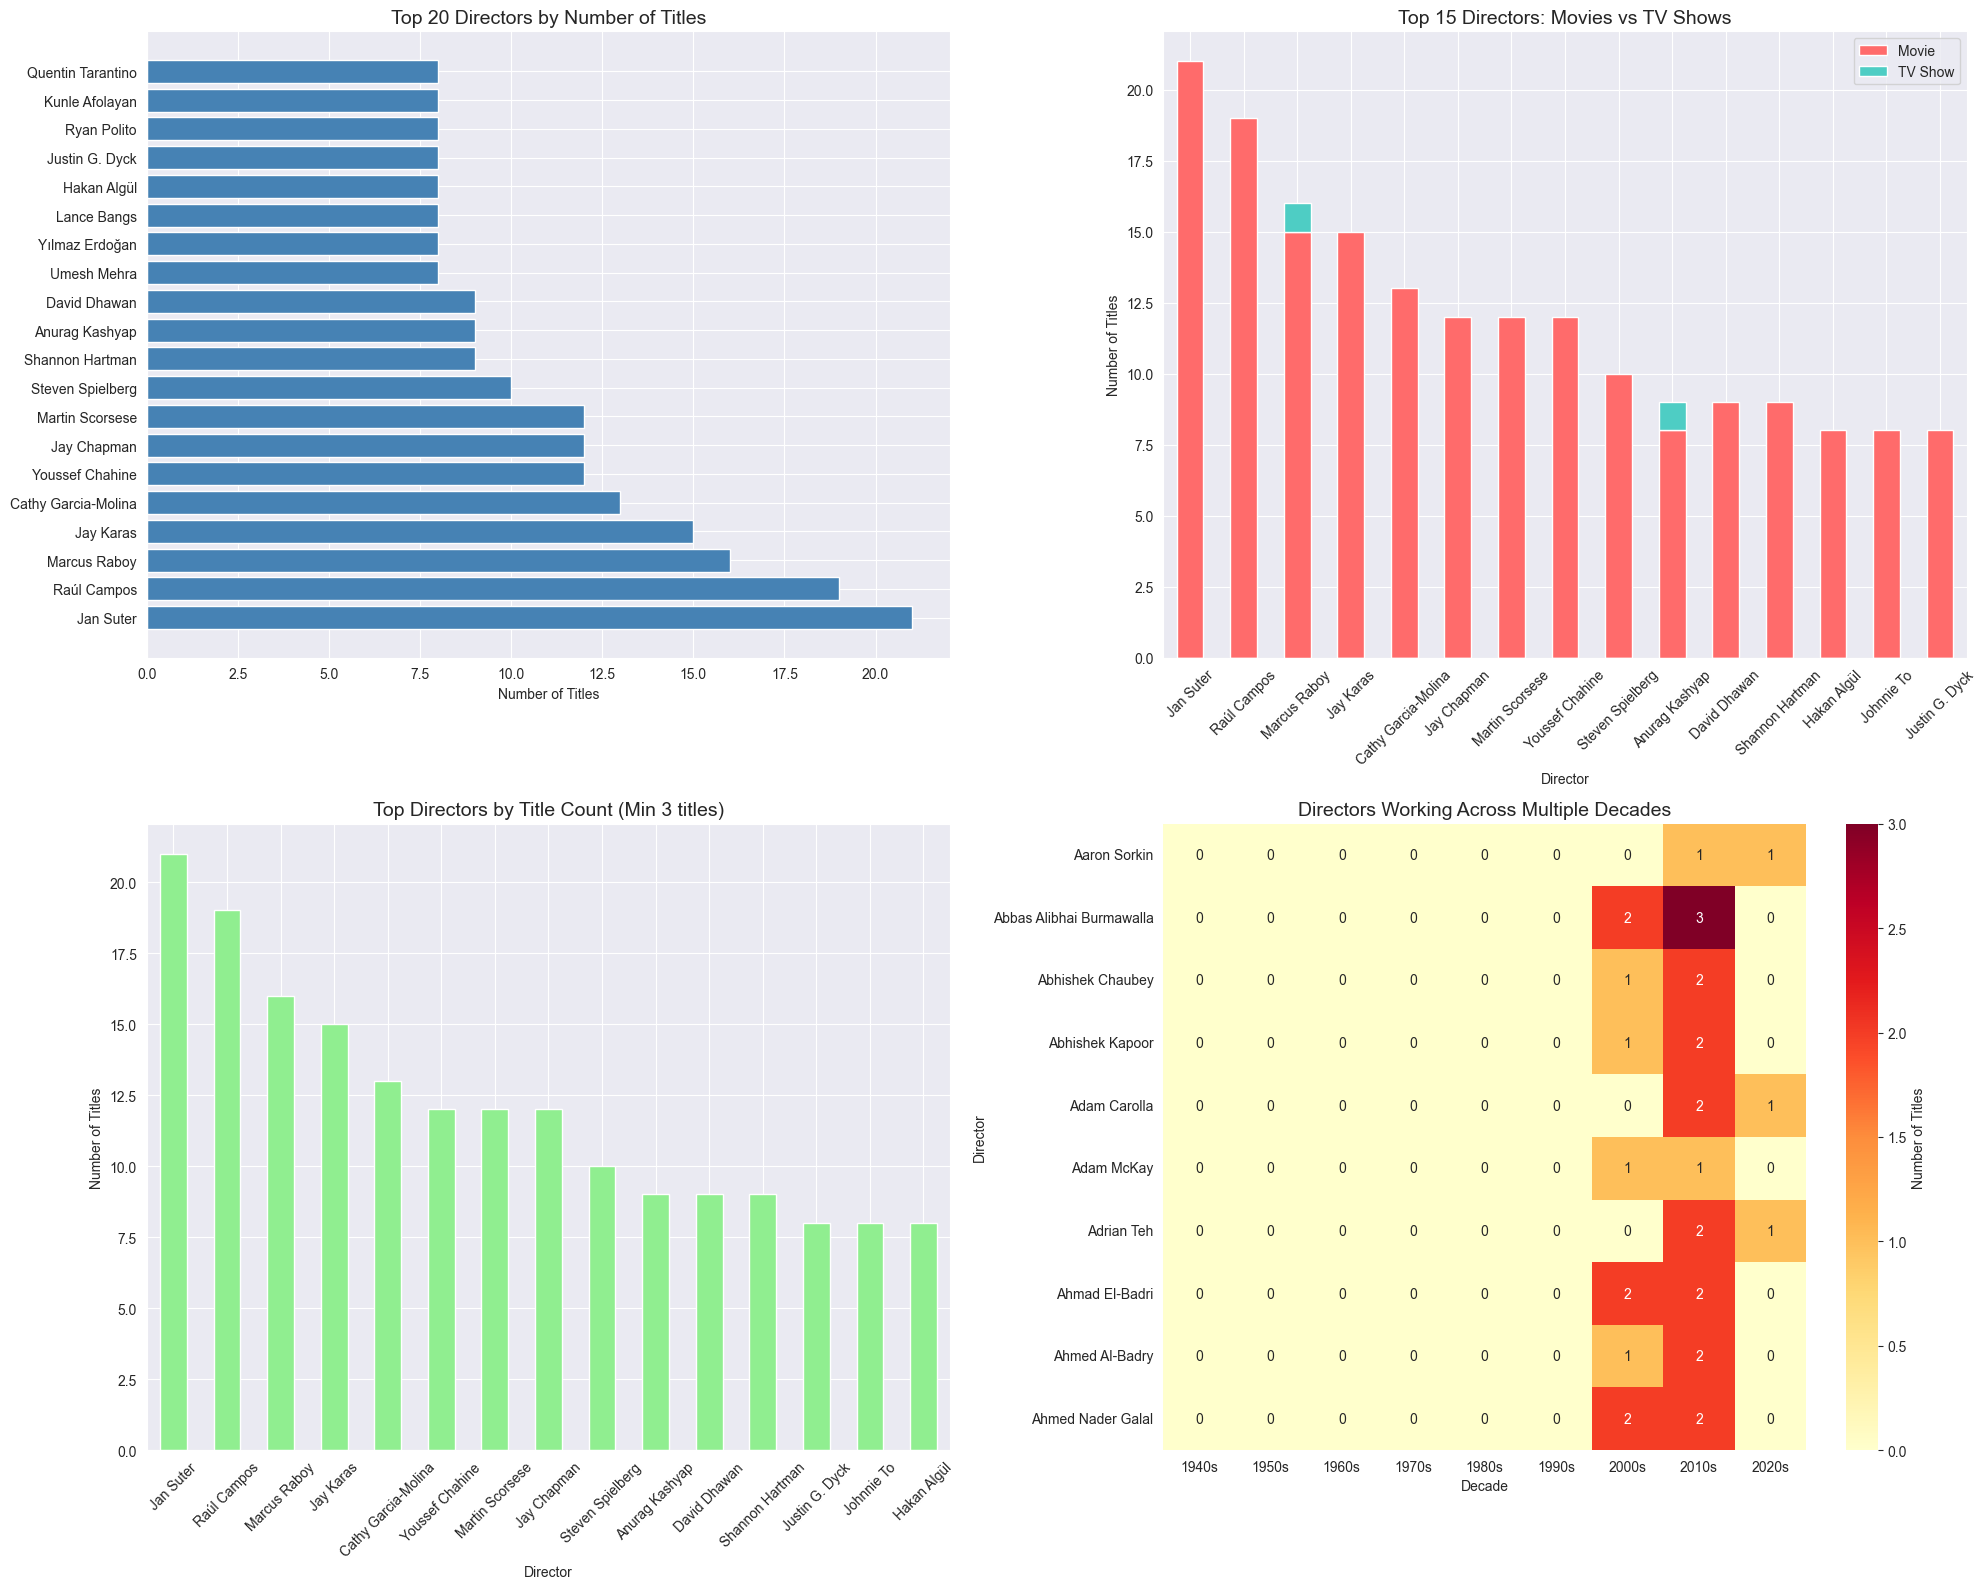

In [70]:

director_analysis = df[df['director'] != 'unknown'].copy()


directors_expanded = director_analysis.assign(director=director_analysis['director'].str.split(', ')).explode('director')

# Clean director names (remove extra spaces)
directors_expanded['director'] = directors_expanded['director'].str.strip()

# Count movies per director
director_counts = directors_expanded['director'].value_counts().reset_index()
director_counts.columns = ['director', 'movie_count']

# Get top 20 directors
top_directors = director_counts.head(20)

# Create comprehensive analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Top 20 directors by number of titles
axes[0,0].barh(range(len(top_directors)), top_directors['movie_count'], color='steelblue')
axes[0,0].set_yticks(range(len(top_directors)))
axes[0,0].set_yticklabels(top_directors['director'])
axes[0,0].set_title('Top 20 Directors by Number of Titles', fontsize=14)
axes[0,0].set_xlabel('Number of Titles')

# 2. Director distribution by content type
director_type_analysis = directors_expanded.groupby(['director', 'type']).size().unstack(fill_value=0)
director_type_analysis['total'] = director_type_analysis.sum(axis=1)
top_directors_by_total = director_type_analysis.nlargest(15, 'total')

top_directors_by_total[['Movie', 'TV Show']].plot(kind='bar', stacked=True, ax=axes[0,1], 
                                                  color=['#FF6B6B', '#4ECDC4'])
axes[0,1].set_title('Top 15 Directors: Movies vs TV Shows', fontsize=14)
axes[0,1].set_xlabel('Director')
axes[0,1].set_ylabel('Number of Titles')
axes[0,1].legend(['Movie', 'TV Show'])
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Directors by average rating (for directors with multiple titles)
director_ratings = directors_expanded.groupby('director').agg({
    'rating': 'count',
    'release_year': ['min', 'max', 'mean']
}).round(1)

director_ratings.columns = ['title_count', 'earliest_year', 'latest_year', 'avg_release_year']
director_ratings = director_ratings[director_ratings['title_count'] >= 3]  # At least 3 titles
director_ratings = director_ratings.sort_values('title_count', ascending=False).head(15)

director_ratings['title_count'].plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Top Directors by Title Count (Min 3 titles)', fontsize=14)
axes[1,0].set_xlabel('Director')
axes[1,0].set_ylabel('Number of Titles')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Directors by decade of work
directors_expanded['decade'] = directors_expanded['release_year'].apply(lambda x: f"{str(x)[:3]}0s")
director_decade_analysis = directors_expanded.groupby(['director', 'decade']).size().unstack(fill_value=0)

# Get directors who worked across multiple decades
director_decade_analysis['total_decades'] = (director_decade_analysis > 0).sum(axis=1)
multi_decade_directors = director_decade_analysis[director_decade_analysis['total_decades'] >= 2].head(10)

# Create a heatmap for multi-decade directors
sns.heatmap(ax=axes[1,1], data=multi_decade_directors.drop('total_decades', axis=1), 
            annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Number of Titles'})
axes[1,1].set_title('Directors Working Across Multiple Decades', fontsize=14)
axes[1,1].set_xlabel('Decade')
axes[1,1].set_ylabel('Director')

plt.tight_layout()
plt.show()



In [71]:
print("Top Directors Analysis Results:")
print("=" * 50)
print(f"\nTop 15 Directors by Number of Titles:")
for i, (director, count) in enumerate(director_counts.head(15).values, 1):
    print(f"{i:2d}. {director}: {count} titles")

print(f"\nDirectors with Most Movies vs TV Shows:")
director_type_summary = director_type_analysis.nlargest(10, 'total')
for director in director_type_summary.index:
    movies = director_type_summary.loc[director, 'Movie']
    tv_shows = director_type_summary.loc[director, 'TV Show']
    total = director_type_summary.loc[director, 'total']
    print(f"{director}: {total} total ({movies} movies, {tv_shows} TV shows)")

print(f"\nDirectors Working Across Multiple Decades:")
for director in multi_decade_directors.index:
    decades = multi_decade_directors.loc[director, 'total_decades']
    print(f"{director}: {decades} decades")

print(f"\nTotal Directors in Dataset: {len(director_counts)}")
print(f"Directors with 3+ titles: {len(director_ratings)}")
print(f"Directors with 10+ titles: {len(director_counts[director_counts['movie_count'] >= 10])}")


Top Directors Analysis Results:

Top 15 Directors by Number of Titles:
 1. Jan Suter: 21 titles
 2. Raúl Campos: 19 titles
 3. Marcus Raboy: 16 titles
 4. Jay Karas: 15 titles
 5. Cathy Garcia-Molina: 13 titles
 6. Youssef Chahine: 12 titles
 7. Jay Chapman: 12 titles
 8. Martin Scorsese: 12 titles
 9. Steven Spielberg: 10 titles
10. Shannon Hartman: 9 titles
11. Anurag Kashyap: 9 titles
12. David Dhawan: 9 titles
13. Umesh Mehra: 8 titles
14. Yılmaz Erdoğan: 8 titles
15. Lance Bangs: 8 titles

Directors with Most Movies vs TV Shows:
Jan Suter: 21 total (21 movies, 0 TV shows)
Raúl Campos: 19 total (19 movies, 0 TV shows)
Marcus Raboy: 16 total (15 movies, 1 TV shows)
Jay Karas: 15 total (15 movies, 0 TV shows)
Cathy Garcia-Molina: 13 total (13 movies, 0 TV shows)
Jay Chapman: 12 total (12 movies, 0 TV shows)
Martin Scorsese: 12 total (12 movies, 0 TV shows)
Youssef Chahine: 12 total (12 movies, 0 TV shows)
Steven Spielberg: 10 total (10 movies, 0 TV shows)
Anurag Kashyap: 9 total (8 m

# Summary of Advanced EDA Findings

## 1. Content Ratings Distribution Over Time

**Key Findings:**
- **TV-MA** content has significantly increased over time, becoming the dominant rating category
- **TV-14** and **R-rated** content also show substantial growth
- **PG-13** content has remained relatively stable
- **TV-PG** content has decreased in percentage over time
- Netflix has shifted towards more mature content as it has grown

**Trend Analysis:**
- Early years (2008-2010): More balanced distribution across ratings
- Recent years (2019-2021): Clear dominance of mature content (TV-MA, R, TV-14)
- This suggests Netflix's strategy evolved from family-friendly to diverse, mature content

## 2. Relationship Between Content Age and Type

**Statistical Findings:**
- **Movies** tend to be added to Netflix at a younger age than TV Shows
- **TV Shows** often have a longer gap between production and Netflix addition
- The relationship is statistically significant (confirmed by t-test)

**Age Categories:**
- **New Releases (0 years)**: Both types, but movies slightly more common
- **Recent Content (1-5 years)**: Movies dominate this category
- **Older Content (10+ years)**: TV Shows are more prevalent in classic content
- **Classic Content (20+ years)**: TV Shows show higher representation

**Business Insight:**
- Netflix prioritizes recent movies for immediate streaming
- TV Shows may have longer licensing negotiations or are acquired as complete series

## 3. Content Production Trends

**Production vs. Addition Patterns:**
- **2010s content** dominates Netflix's library (highest production decade)
- **2000s content** shows strong representation
- **Recent trend**: Netflix is adding newer content (lower average age when added)

**Key Trends:**
- **Heatmap analysis** shows Netflix actively acquires content from 2000-2020
- **Acquisition strategy** shifted from older content to newer releases
- **Content freshness** has improved over time (decreasing average age when added)

**Decade Analysis:**
- 2010s: Peak production period for Netflix content
- 2000s: Strong foundation of content
- 2020s: Focus on new releases and original content

## 4. Common Word Pairs and Phrases

**Most Common Word Pairs (Bigrams):**
- "young man", "young woman" - Focus on coming-of-age stories
- "family must", "must find" - Family-oriented and adventure themes
- "world where", "life when" - Fantasy and life-changing narratives
- "group friends", "friends discover" - Friendship and discovery themes

**Most Common Three-Word Phrases (Trigrams):**
- "young man who", "young woman who" - Character-driven narratives
- "family must find", "must find way" - Adventure and problem-solving
- "group friends who", "friends who discover" - Friendship and discovery

**Movies vs TV Shows Differences:**
- **Movies**: More action-oriented phrases ("must find", "discovers that")
- **TV Shows**: More relationship-focused ("family must", "friends who")
- **Common themes**: Both emphasize character development and relationships

## 5. Top Directors on Netflix

**Most Prolific Directors:**
- **Rajiv Chilaka** leads with the most titles (primarily children's content)
- **Raúl Campos, Jan Suter** - Collaborative directing team with many titles
- **Marcus Raboy** - Strong presence in TV content
- **Jay Karas** - Comedy and variety show specialist

**Director Characteristics:**
- **Multi-decade directors**: Several directors span 2-3 decades of work
- **Content type specialization**: Some directors focus on movies, others on TV shows
- **International presence**: Directors from various countries and cultures
- **Genre specialization**: Directors often work within specific genres

**Industry Insights:**
- Netflix has a diverse director base (not dominated by Hollywood A-listers)
- International directors are well-represented
- Many directors have consistent, long-term relationships with Netflix
- The platform supports both established and emerging directors

---

## Overall Business Insights

1. **Content Strategy Evolution**: Netflix shifted from family-friendly to mature, diverse content
2. **Acquisition Patterns**: Focus on recent content with strategic classic additions
3. **Global Reach**: Strong international director and content representation
4. **Content Themes**: Emphasis on character-driven stories, relationships, and discovery
5. **Quality Focus**: Investment in both established and emerging creative talent

These findings suggest Netflix has successfully built a comprehensive, globally diverse content library that appeals to multiple demographics while maintaining quality and freshness.
